In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importation des données
df = pd.read_csv('../data/suites_cities.csv', sep=',')

# Ex. 3

### Numpy & Pandas


In [3]:
# Sur la surface: Moyenne, écart-type, surface minimale et maximale.

# Génération de statistiques sur les surfaces
surface_stats = df['surface'].describe()

# Extraction des statistiques
mean_surface = surface_stats['mean']
std_dev_surface = surface_stats['std']
min_surface = surface_stats['min']
max_surface = surface_stats['max']

# Affichage des statistiques
print('Surface moyenne : {:.2f}'.format(mean_surface))
print('Écart type : {:.2f}'.format(std_dev_surface))
print('Surface minimale : {:.2f}'.format(min_surface))
print('Surface maximale : {:.2f}'.format(max_surface))

Surface moyenne : 60.18
Écart type : 30.96
Surface minimale : 15.00
Surface maximale : 130.00


In [4]:
# Sur l'anne: Moyenne, construction la plus ancienne, la plus récente.

# Génération de statistiques sur les années
year_stats = df['year'].describe()

# Extraction des statistiques
mean_year = year_stats['mean']
min_year = year_stats['min']
max_year = year_stats['max']

# Affichage des statistiques
print('Année moyenne : {:.0f}'.format(mean_surface))
print('Année minimale : {:.0f}'.format(min_year))
print('Année maximale : {:.0f}'.format(max_year))

Année moyenne : 60
Année minimale : 2008
Année maximale : 2024


In [5]:
# Sur le bacon: Proportion d'appartements avec un balcon.

apartments_balcony = df['balcony'].mean()
print('Proportion d\'appartements avec un balcon : {:.2%}'.format(apartments_balcony))



Proportion d'appartements avec un balcon : 88.00%


In [6]:
# Comptage du nombre d'appartements dans chaque catégorie de prix (low, normal, high, scam).

price_counts = df['price_category'].value_counts()
print(price_counts)

price_category
normal    18
high      13
low       11
scam       8
Name: count, dtype: int64


In [7]:
# Nombre de chambres (nbRooms): Moyenne, médiane, variance, écart-type.

mean_nbRooms = df['nbRooms'].mean()
median_nbRooms = df['nbRooms'].median()
variance_nbRooms = df['nbRooms'].var()
std_dev_nbRooms = df['nbRooms'].std()

print('Moyenne :', mean_nbRooms)
print('Médianne :', median_nbRooms)
print('Variance :', variance_nbRooms)
print('Écart type :', std_dev_nbRooms)

Moyenne : 2.96
Médianne : 3.0
Variance : 2.610612244897959
Écart type : 1.615738916068422


### Matplop

<Axes: xlabel='price_category'>

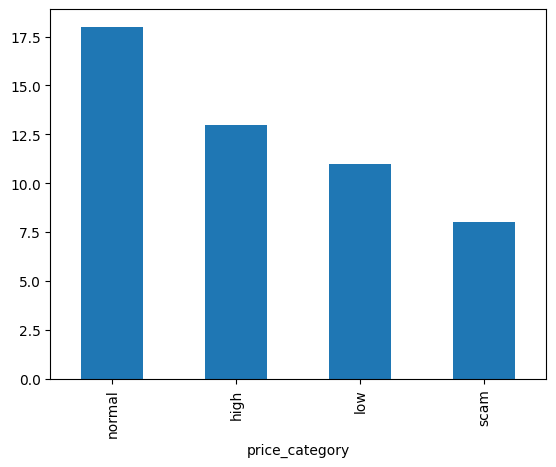

In [8]:
# Créer un Diagramme à barres pour afficher la répartition des catégories de prix 
# (par exemple, combien d'appartements sont "low", "normal", "high", "scam").

df['price_category'].value_counts().plot(kind='bar')

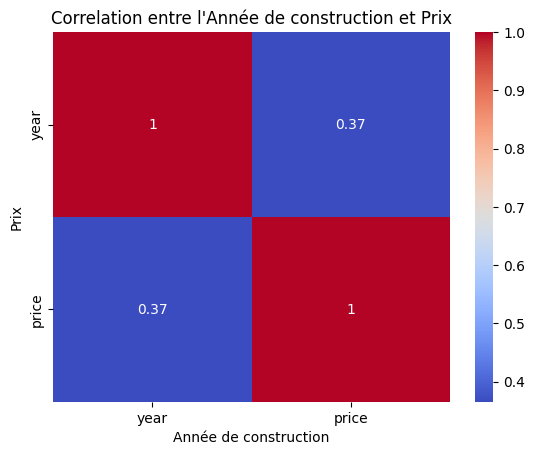

In [9]:
# Créer un Heatmap pour voir la correlation entre Année de construction et prix afin 
# de voir si les appartements plus récents ont tendance à être plus chers.

# Création de la matrice de corrélation
corr_matrix = df[['year', 'price']].corr()

# Création de la heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Affichage du titre et des labels
plt.title('Correlation entre l\'Année de construction et Prix')
plt.xlabel('Année de construction')
plt.ylabel('Prix')

# Affichage du graphique
plt.show()

1. Compléter avec une nouvelle colonne ville dans votre dataset si l'appartement est de Lyon, Paris ou Marseille.


2. Créer une prédiction par regression linéaire sur la note en fonction de la ville, de la surface et du prix

In [10]:
# Importation des bibliothèques nécessaires pour la régression linéaire
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Encodage de la variable catégorielle "ville"
encoder = OneHotEncoder()
encoded_cities = encoder.fit_transform(df[['city']]).toarray()

# Ajout de l'encodage dans le DataFrame
city_encoded_df = pd.DataFrame(encoded_cities, columns=encoder.get_feature_names_out(['city']))
df_encoded = pd.concat([df, city_encoded_df], axis=1)

# Sélection des variables indépendantes (ville, surface, prix) et de la variable dépendante (note)
X = pd.concat([city_encoded_df, df[['surface', 'price']]], axis=1)
y = df['note']

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Évaluation du modèle avec l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Affichage des coefficients du modèle
print('Coefficients du modèle :', model.coef_)
print('Intercept du modèle :', model.intercept_)


Mean Squared Error: 0.6273240068300563
Coefficients du modèle : [ 2.86162482e-01  6.35710681e-01 -9.21873163e-01  5.14302186e-03
  7.54173537e-06]
Intercept du modèle : 1.280259345641758


3. Créer une prédiction par regression linéaire sur l'année en fonction de la ville puis donnéer sa propabilité (R2) et son taux d'erreur en année (RSME ou MSE)

In [11]:
# Sélection automatique des colonnes encodées (si elles commencent par 'city_')
X_city = df_encoded.filter(like='city_')
y_year = df['year']

# Division des données en ensemble d'entraînement et de test
X_city_train, X_city_test, y_year_train, y_year_test = train_test_split(X_city, y_year, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression linéaire
model_city = LinearRegression()
model_city.fit(X_city_train, y_year_train)

# Prédiction sur les données de test
y_year_pred = model_city.predict(X_city_test)

# Évaluation du modèle avec le coefficient de détermination R²
r2_year = model_city.score(X_city_test, y_year_test)
print('Coefficient de détermination R² :', r2_year)

# Évaluation du modèle avec l'erreur quadratique moyenne (MSE)
mse_year = mean_squared_error(y_year_test, y_year_pred)
print('Erreur quadratique moyenne (MSE) :', mse_year)

# Calcul du Root Mean Squared Error (RMSE)
rmse_year = mse_year ** 0.5
print('Erreur quadratique moyenne racine (RMSE) :', rmse_year)


Coefficient de détermination R² : 0.15938694687428367
Erreur quadratique moyenne (MSE) : 20.544583018392508
Erreur quadratique moyenne racine (RMSE) : 4.532613265919839


In [12]:
from sklearn.metrics import r2_score

# Prepare the data
X = df_encoded.filter(like='city_')
y = df['year']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2:.4f}")
print(f"RMSE (en années): {rmse:.2f}")

R2 Score: 0.1594
RMSE (en années): 4.53


4. Créer une classification logistique pour savoir si il y a un garage en fonction du prix et de la ville 

c:\Users\dilo145\anaconda3\envs\esgi\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


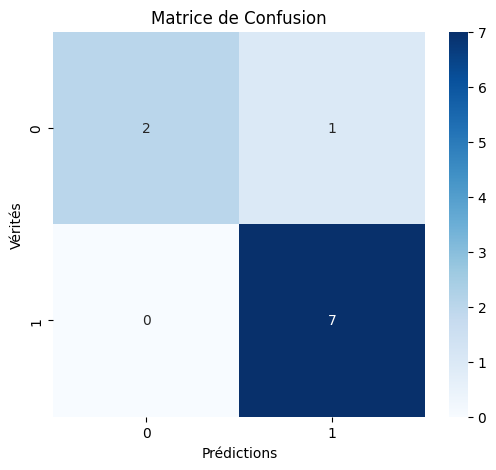

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Sélection des variables indépendantes (ville, prix) et de la variable dépendante (garage)
X_logistic = df_encoded[['city_Lyon', 'city_Marseille', 'city_Paris', 'price']]
y_logistic = df_encoded['garage']

# Division des données en ensemble d'entraînement et de test
X_logistic_train, X_logistic_test, y_logistic_train, y_logistic_test = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression logistique
logistic_model = LogisticRegression()
logistic_model.fit(X_logistic_train, y_logistic_train)

# Prédiction sur les données de test
y_logistic_pred = logistic_model.predict(X_logistic_test)

# Évaluation du modèle
conf_matrix = confusion_matrix(y_logistic_test, y_logistic_pred)
# class_report = classification_report(y_logistic_test, y_logistic_pred)

# Affichage du rapport de classification
# print('Rapport de Classification :\n', class_report)

# Affichage des résultats dans un graphique
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.show()

5. Créer une classification par KNN pour savoir si il a un balcon en fonction du prix et de la ville

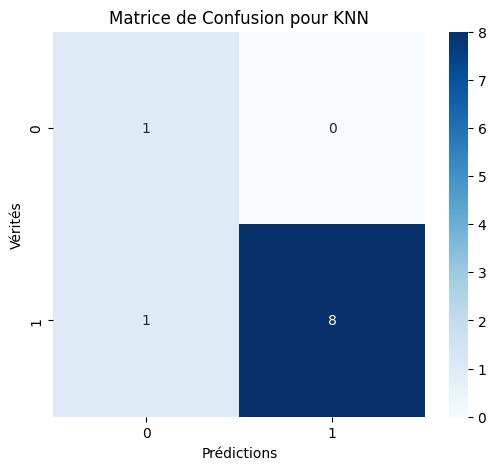

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Sélection des variables indépendantes (ville, prix) et de la variable dépendante (balcony)
X_knn = df_encoded[['city_Lyon', 'city_Marseille', 'city_Paris', 'price']]
y_knn = df_encoded['balcony']

# Division des données en ensemble d'entraînement et de test
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Création et entraînement du modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_knn_train, y_knn_train)

# Prédiction sur les données de test
y_knn_pred = knn_model.predict(X_knn_test)

# Évaluation du modèle
conf_matrix_knn = confusion_matrix(y_knn_test, y_knn_pred)
# class_report_knn = classification_report(y_knn_test, y_knn_pred)

# Affichage du rapport de classification
# print('Rapport de Classification pour KNN:\n', class_report_knn)

# Affichage des résultats dans un graphique
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion pour KNN')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.show()

6.  Pour les 2 classific ation précédente: afficher le accuracy, recall puis F1 Score

In [15]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Logistic Regression Metrics
accuracy_logistic = accuracy_score(y_logistic_test, y_logistic_pred)
recall_logistic = recall_score(y_logistic_test, y_logistic_pred)
f1_logistic = f1_score(y_logistic_test, y_logistic_pred)

print(f"Logistic Regression - Accuracy: {accuracy_logistic:.2f}, Recall: {recall_logistic:.2f}, F1 Score: {f1_logistic:.2f}")

# KNN Metrics
accuracy_knn = accuracy_score(y_knn_test, y_knn_pred)
recall_knn = recall_score(y_knn_test, y_knn_pred)
f1_knn = f1_score(y_knn_test, y_knn_pred)

print(f"KNN - Accuracy: {accuracy_knn:.2f}, Recall: {recall_knn:.2f}, F1 Score: {f1_knn:.2f}")

Logistic Regression - Accuracy: 0.90, Recall: 1.00, F1 Score: 0.93
KNN - Accuracy: 0.90, Recall: 0.89, F1 Score: 0.94


7.  Bonus: Comparer les 2 méthodes de classification KNN et logistique précédente pour voir celle qui prédits le mieux: (accuracy, recall puis F1 Score)

In [16]:
# Create a DataFrame to compare the metrics
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'F1 Score'],
    'Logistic Regression': [accuracy_logistic, recall_logistic, f1_logistic],
    'KNN': [accuracy_knn, recall_knn, f1_knn]
})

# Display the comparison DataFrame
print(comparison_df)

     Metric  Logistic Regression       KNN
0  Accuracy             0.900000  0.900000
1    Recall             1.000000  0.888889
2  F1 Score             0.933333  0.941176


8.  Bonus ULTIMATE: Créer une classification avec Random Forest (new algo) pour savoir si il y a un balcon en fonction du prix et de la ville 

Random Forest - Accuracy: 0.90, Recall: 0.89, F1 Score: 0.94


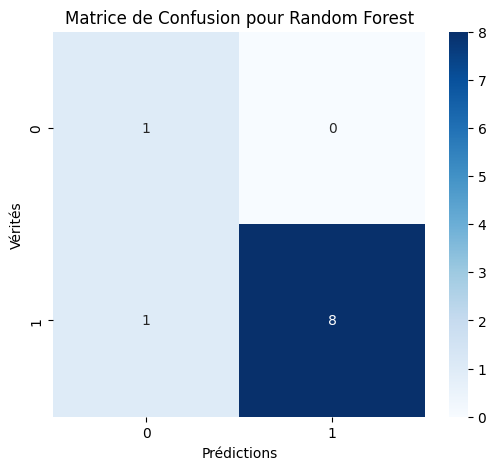

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Sélection des variables indépendantes (ville, prix) et de la variable dépendante (balcony)
X_rf = df_encoded[['city_Lyon', 'city_Marseille', 'city_Paris', 'price']]
y_rf = df_encoded['balcony']

# Division des données en ensemble d'entraînement et de test
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Création et entraînement du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_rf_train, y_rf_train)

# Prédiction sur les données de test
y_rf_pred = rf_model.predict(X_rf_test)

# Évaluation du modèle
accuracy_rf = accuracy_score(y_rf_test, y_rf_pred)
recall_rf = recall_score(y_rf_test, y_rf_pred)
f1_rf = f1_score(y_rf_test, y_rf_pred)

print(f"Random Forest - Accuracy: {accuracy_rf:.2f}, Recall: {recall_rf:.2f}, F1 Score: {f1_rf:.2f}")

# Affichage des résultats dans un graphique
conf_matrix_rf = confusion_matrix(y_rf_test, y_rf_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion pour Random Forest')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.show()